In [226]:
import pandas as pd
import numpy as np

# Importação dos dataframes

In [227]:
products = pd.read_json("data/products.json")
products.head()

,Id,Name,UnitPrice
0,1,Build your own computer,1200.0
1,2,Digital Storm VANQUISH 3 Custom Performance PC,1259.0
2,3,Lenovo IdeaCentre 600 All-in-One PC,500.0
3,4,Apple MacBook Pro 13-inch,1800.0
4,5,Asus N551JK-XO076H Laptop,1500.0


In [228]:
ratings = pd.read_json("data/ratings.json")
ratings.head()

,CustomerID,ProductID,Rate,CreateDate
0,103416,619,1,2018/01/01 01:36:30
1,103654,411,1,2018/01/01 01:36:35
2,103954,298,3,2018/01/01 01:36:38
3,103672,361,5,2018/01/01 01:37:15
4,103960,536,5,2018/01/01 02:36:25


# Tratamento de dados

Retirando coluna createDate da DF de avaliações. Não é do nosso interesse.

In [229]:
ratings.drop(columns= "CreateDate", axis=1, inplace=True)

Verificando a presença de valores nulos

In [230]:
ratings.isna().sum()

CustomerID    0
ProductID     0
Rate          0
dtype: int64

In [231]:
products.isna().sum()

Id           0
Name         0
UnitPrice    0
dtype: int64

Criando uma coluna de quantidade de avaliação do produto para o DF de produtos.

In [232]:
rating_count = ratings['ProductID'].value_counts().reset_index()
rating_count.columns = ['ProductID', 'rating_count']

In [233]:
products = products.merge(rating_count, left_on='Id', right_on='ProductID', how='left')

In [234]:
products.drop('ProductID', axis=1, inplace=True)

Verificando se existem valores not a number na contagem de avaliações dos produtos.

In [235]:
products['rating_count'].isna().value_counts()

rating_count
False    691
Name: count, dtype: int64

In [236]:
products.head()

,Id,Name,UnitPrice,rating_count
0,1,Build your own computer,1200.0,207
1,2,Digital Storm VANQUISH 3 Custom Performance PC,1259.0,204
2,3,Lenovo IdeaCentre 600 All-in-One PC,500.0,201
3,4,Apple MacBook Pro 13-inch,1800.0,184
4,5,Asus N551JK-XO076H Laptop,1500.0,198


# Anáilise Exploratória

In [237]:
products.shape

(691, 4)

In [238]:
ratings.shape

(130754, 3)

In [239]:
ratings['CustomerID'].value_counts()

CustomerID
103996    1427
103765    1366
103367    1341
103505    1303
103707    1257
          ... 
103354     100
103693     100
14486      100
103898     100
103829     100
Name: count, Length: 344, dtype: int64

<Axes: >

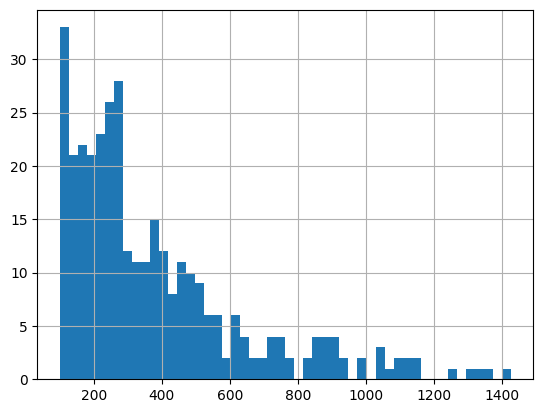

In [240]:
ratings['CustomerID'].value_counts().hist(bins=50)

Com o gráfico e a contagem acima, podemos vizualizar que a maioria dos usuários fizeram por volta de 100 e 200 avaliações. É uma quantidade muito grande de usuários, para uma quantidade pequena de avaliações. Não vai dar o peso ideal pro modelo, por isso vamos fazer uma filtragem para ter dados mais acertivos para a nossa ia. A nossa regra de negócio no momento será filtrar usuários que fizeram mais de 199 avaliações. Dependendo de como for a acertividade do nosso modelo preditivo, faremos uma avaliação da nossa regra de negócio.

# Pré processamento

In [241]:
user_most_rated = ratings['CustomerID'].value_counts() > 199
selected_users = user_most_rated[user_most_rated].index

selected_users.shape

(250,)

Visualizando id's filtrados

In [242]:
selected_users

Index([103996, 103765, 103367, 103505, 103707, 103629, 103834, 103907, 103873,
       103820,
       ...
       103327, 103748, 103590, 103442, 103801, 103766, 103726, 103387, 103686,
       103594],
      dtype='int64', name='CustomerID', length=250)

Atualizando dataframe de avaliações com os usuários que avaliaram mais de 100 vezes

In [243]:
ratings = ratings[ratings['CustomerID'].isin(selected_users)]

In [244]:
ratings.shape

(117150, 3)

Aplicando a mesma lógica aos produtos

In [245]:
products = products[products['rating_count']> 199]

products

,Id,Name,UnitPrice,rating_count
0,1,Build your own computer,1200.00,207
1,2,Digital Storm VANQUISH 3 Custom Performance PC,1259.00,204
2,3,Lenovo IdeaCentre 600 All-in-One PC,500.00,201
6,7,HP Spectre XT Pro UltraBook,1350.00,208
7,8,HP Envy 6-1180ca 15.6-Inch Sleekbook,1460.00,204
...,...,...,...,...
637,638,OPPO Reno6 Z 5G,254.00,200
647,648,Diamond Promise Ring 1/10 ct tw Baguette & Rou...,299.99,203
686,687,Bird Box,1.00,204
687,688,Snowpiercer,2.00,202


# Concatenação dos dataframes.

In [246]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 0 to 688
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            134 non-null    int64  
 1   Name          134 non-null    object 
 2   UnitPrice     134 non-null    float64
 3   rating_count  134 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 5.2+ KB


In [247]:
products.rename(columns={"Id": "ProductID"}, inplace=True)

In [248]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 0 to 688
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductID     134 non-null    int64  
 1   Name          134 non-null    object 
 2   UnitPrice     134 non-null    float64
 3   rating_count  134 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 5.2+ KB


In [249]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117150 entries, 0 to 130753
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   CustomerID  117150 non-null  int64
 1   ProductID   117150 non-null  int64
 2   Rate        117150 non-null  int64
dtypes: int64(3)
memory usage: 3.6 MB


Concatenando dataframes com base no id dos produtos.

In [250]:
df_ratings_products = ratings.merge(products, on= 'ProductID')
df_ratings_products.head()

,CustomerID,ProductID,Rate,Name,UnitPrice,rating_count
0,103954,298,3,Heart Ring 1/5 ct tw Diamonds 10K Two-Tone Gold,479.00,200
1,103726,260,4,Men's Diamond Band 1-1/2 ct tw Round-cut 10K W...,3999.99,200
2,103651,388,5,"Garnet MOM Heart Necklace Sterling Silver 18""",179.99,205
3,103356,473,1,Le Vian Natural Emerald Necklace 1/5 ct tw Dia...,1299.99,202
4,103577,548,2,Unstoppable Love Necklace Lab-Created Sapphire...,99.99,202


In [267]:
df_ratings_products.isna().sum()

CustomerID      0
ProductID       0
Rate            0
Name            0
UnitPrice       0
rating_count    0
dtype: int64

Dropando possíveis duplicatas

In [273]:
df_ratings_products.drop_duplicates(['CustomerID', 'ProductID'], inplace=True)

retirada do id do produto(Não é mais necessario, recomendação será um valor rotulado "Name")

In [274]:
df_ratings_products.drop(columns="ProductID", axis=1, inplace=True)

In [275]:
df_ratings_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18478 entries, 0 to 24726
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    18478 non-null  int64  
 1   Rate          18478 non-null  int64  
 2   Name          18478 non-null  object 
 3   UnitPrice     18478 non-null  float64
 4   rating_count  18478 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 866.2+ KB


# Convertendo Dataframe novo para treinamento do nosso classificador

In [276]:
products_pivot = df_ratings_products.pivot_table(columns="CustomerID", index="Name", values='Rate')

In [279]:
products_pivot.head()

CustomerID,6,13874,13879,14180,14902,14906,15018,15042,15202,22881,...,103971,103972,103977,103982,103985,103987,103988,103991,103996,103997
Name,,,,,,,,,,,,,,,,,,,,,
1/6 Ct. tw Diamond Initials Couple's Heart Necklace,1.0,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN
1/8 Ct. tw Diamond Nameplate Heart Necklace,NaN,4.0,5.0,4.0,NaN,NaN,NaN,2.0,NaN,2.0,...,NaN,1.0,5.0,4.0,NaN,NaN,NaN,2.0,4.0,NaN
Amethyst & White Lab-Created Sapphire Drop Earrings 10K Rose Gold,1.0,NaN,NaN,NaN,NaN,4.0,NaN,5.0,1.0,1.0,...,NaN,5.0,NaN,NaN,1.0,5.0,5.0,NaN,4.0,1.0
Amethyst Heart Necklace Diamond Accents Sterling Silver,1.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.0,1.0,...,5.0,5.0,5.0,4.0,NaN,5.0,NaN,NaN,4.0,1.0
Aquamarine & Diamond Ring 10K White Gold,1.0,5.0,NaN,4.0,NaN,4.0,NaN,2.0,NaN,1.0,...,5.0,1.0,5.0,4.0,NaN,NaN,5.0,2.0,4.0,NaN


Podemos ver pelo novo dataframe acima que para cada usuário temos uma coluna com suas avaliações. E cada linha representa um produto. Esses dados serão agora tratados um última vez antes de treinarmos com o KNN

Preenchendo valores nan com zero para treinamento da IA

In [281]:
products_pivot.fillna(0, inplace=True)
products_pivot.head()

CustomerID,6,13874,13879,14180,14902,14906,15018,15042,15202,22881,...,103971,103972,103977,103982,103985,103987,103988,103991,103996,103997
Name,,,,,,,,,,,,,,,,,,,,,
1/6 Ct. tw Diamond Initials Couple's Heart Necklace,1.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
1/8 Ct. tw Diamond Nameplate Heart Necklace,0.0,4.0,5.0,4.0,0.0,0.0,0.0,2.0,0.0,2.0,...,0.0,1.0,5.0,4.0,0.0,0.0,0.0,2.0,4.0,0.0
Amethyst & White Lab-Created Sapphire Drop Earrings 10K Rose Gold,1.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,1.0,1.0,...,0.0,5.0,0.0,0.0,1.0,5.0,5.0,0.0,4.0,1.0
Amethyst Heart Necklace Diamond Accents Sterling Silver,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,...,5.0,5.0,5.0,4.0,0.0,5.0,0.0,0.0,4.0,1.0
Aquamarine & Diamond Ring 10K White Gold,1.0,5.0,0.0,4.0,0.0,4.0,0.0,2.0,0.0,1.0,...,5.0,1.0,5.0,4.0,0.0,0.0,5.0,2.0,4.0,0.0


Para poder treinar nosso modelo, considerando que nosso conjunto de dados de treino é muito grande, teremos que compactar esse dataframe utilizando o conceito de matriz sparse. Atravéz da função csr_matrix conseguimos simplificar a extrutura do dataframe onde existem muitos zeros para poder deixa-lo mais leve.

In [282]:
from scipy.sparse import csr_matrix

In [283]:
products_sparse = csr_matrix(products_pivot)

# Treinamento do modelo

In [285]:
from sklearn.neighbors import NearestNeighbors